In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
# Load the data
data = pd.read_csv("superstore_data.csv")  # Replace "your_data.csv" with your actual file name



In [2]:
pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB 5.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.0 MB 7.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.0 MB 8.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 6.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 6.1 MB/s eta 0:00:02
   ------ ----------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hi\\anaconda3\\anaconda_navigator\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------  256.0/258.3 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Data Exploration
print(data.head())  # Check the first few rows of the data


      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3   11/5/2014        0        10  ...                0                 0   
4    8/4/2014        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurch

In [7]:
print(data.info())  # Get information about the data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
print(data.describe())  # Summary statistics of numerical variables



                 Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [9]:
# Check for missing values
print(data.isnull().sum())



Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [10]:
data.loc[data.Income.isnull(), 'Income'] = np.nanmedian(data.Income)

In [11]:
# Check for missing values
print(data.isnull().sum())


Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64


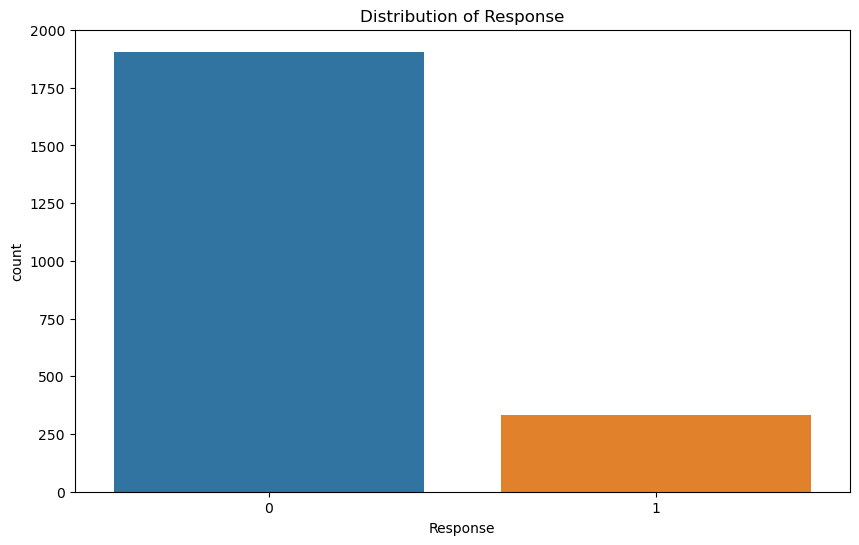

In [12]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', data=data)
plt.title('Distribution of Response')
plt.show()



In [13]:
data[data.Year_Birth <= 1900]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/2014,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,9/26/2013,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1


In [14]:
# excluding these samples

data.drop(data.index[data.Year_Birth <= 1900], inplace=True)
data.drop(data.index[data.Income > 300000], inplace=True)

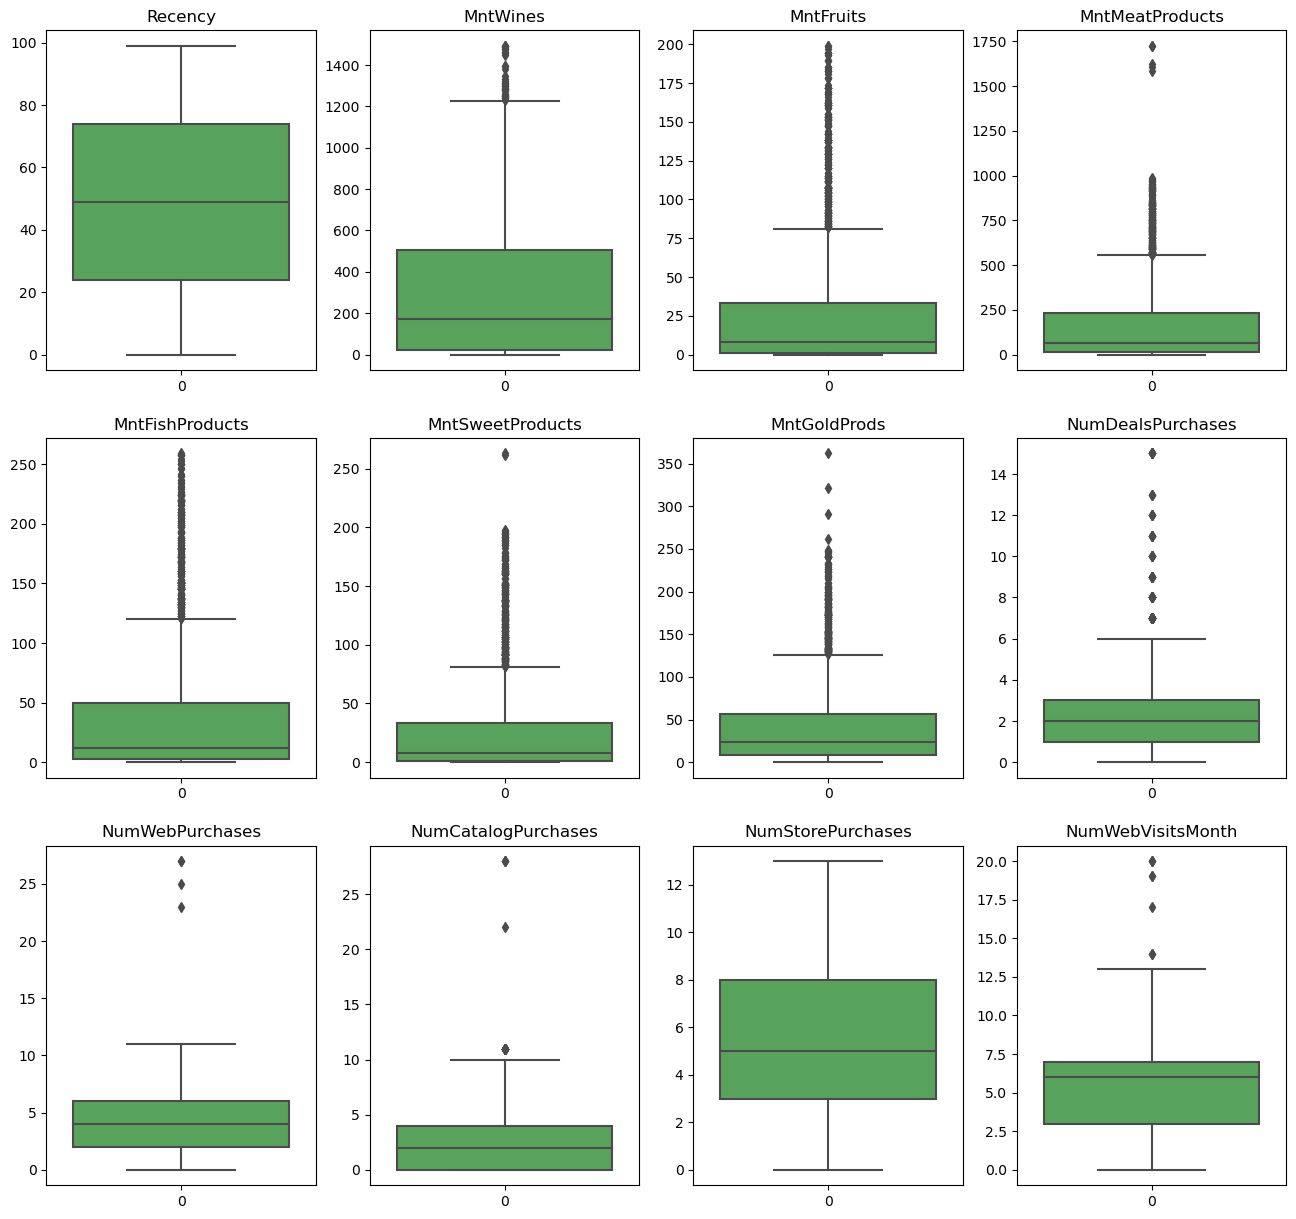

In [15]:
list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(data[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

In [16]:
data.drop(data.index[data.MntMeatProducts > 1200], inplace=True)
data.drop(data.index[data.MntSweetProducts > 240], inplace=True)
data.drop(data.index[data.MntGoldProds > 270], inplace=True)

In [17]:
data.shape

(2227, 22)

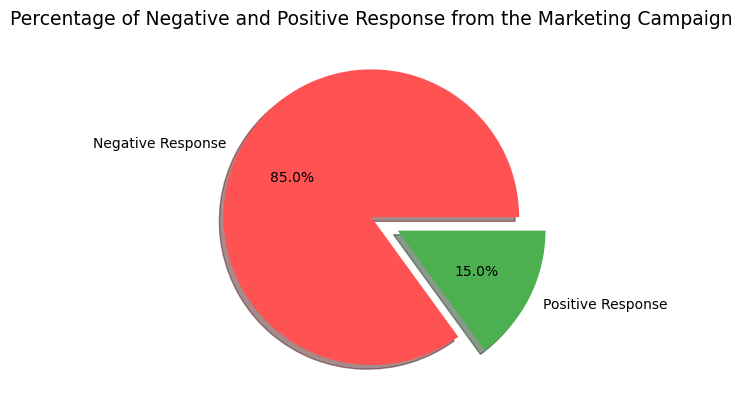

In [18]:
fig, ax = plt.subplots()

ax.pie(
    data.Response.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign', fontsize=13.5)

plt.show()

In [19]:
response_date = data.groupby('Dt_Customer')['Response'].mean().reset_index()
response_date['Dt_Customer'] = response_date.Dt_Customer.astype(str)

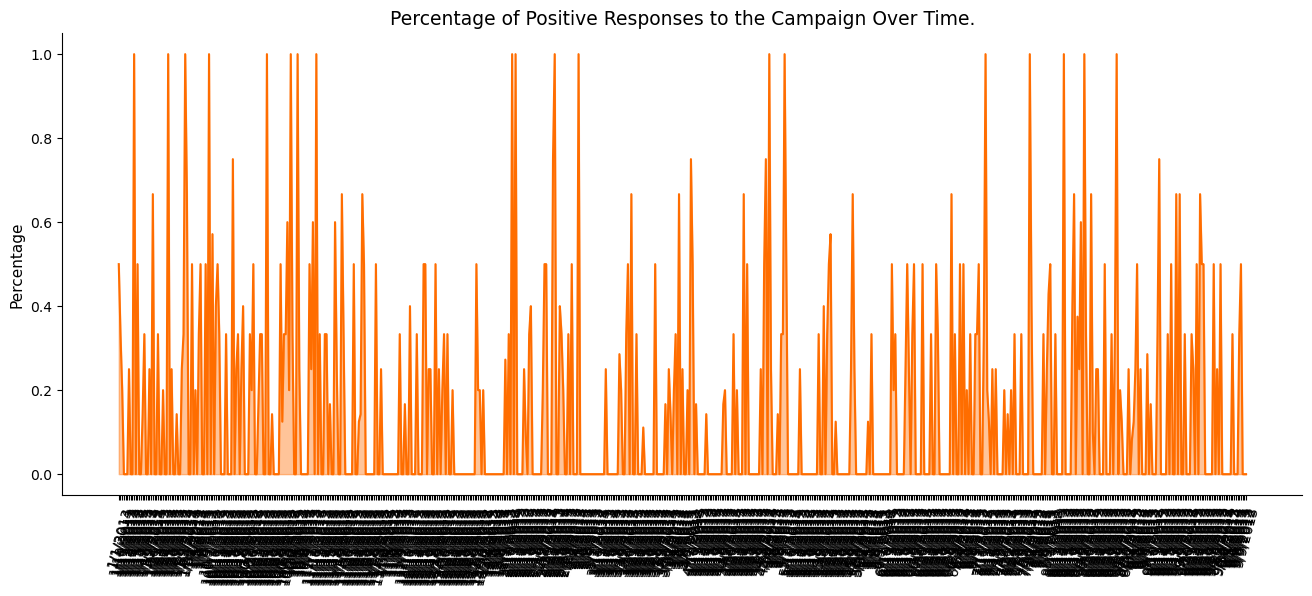

In [20]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.plot(response_date['Dt_Customer'], response_date['Response'], color='#ff6d00')
plt.fill_between(response_date['Dt_Customer'], response_date['Response'], color='#ff6d00', alpha=0.4)

ax.tick_params(axis='x', rotation=75)
ax.spines[['top', 'right']].set_visible(False)

ax.set_title('Percentage of Positive Responses to the Campaign Over Time.', fontsize=13.5)
ax.set_ylabel('Percentage', fontsize=11)

plt.show()

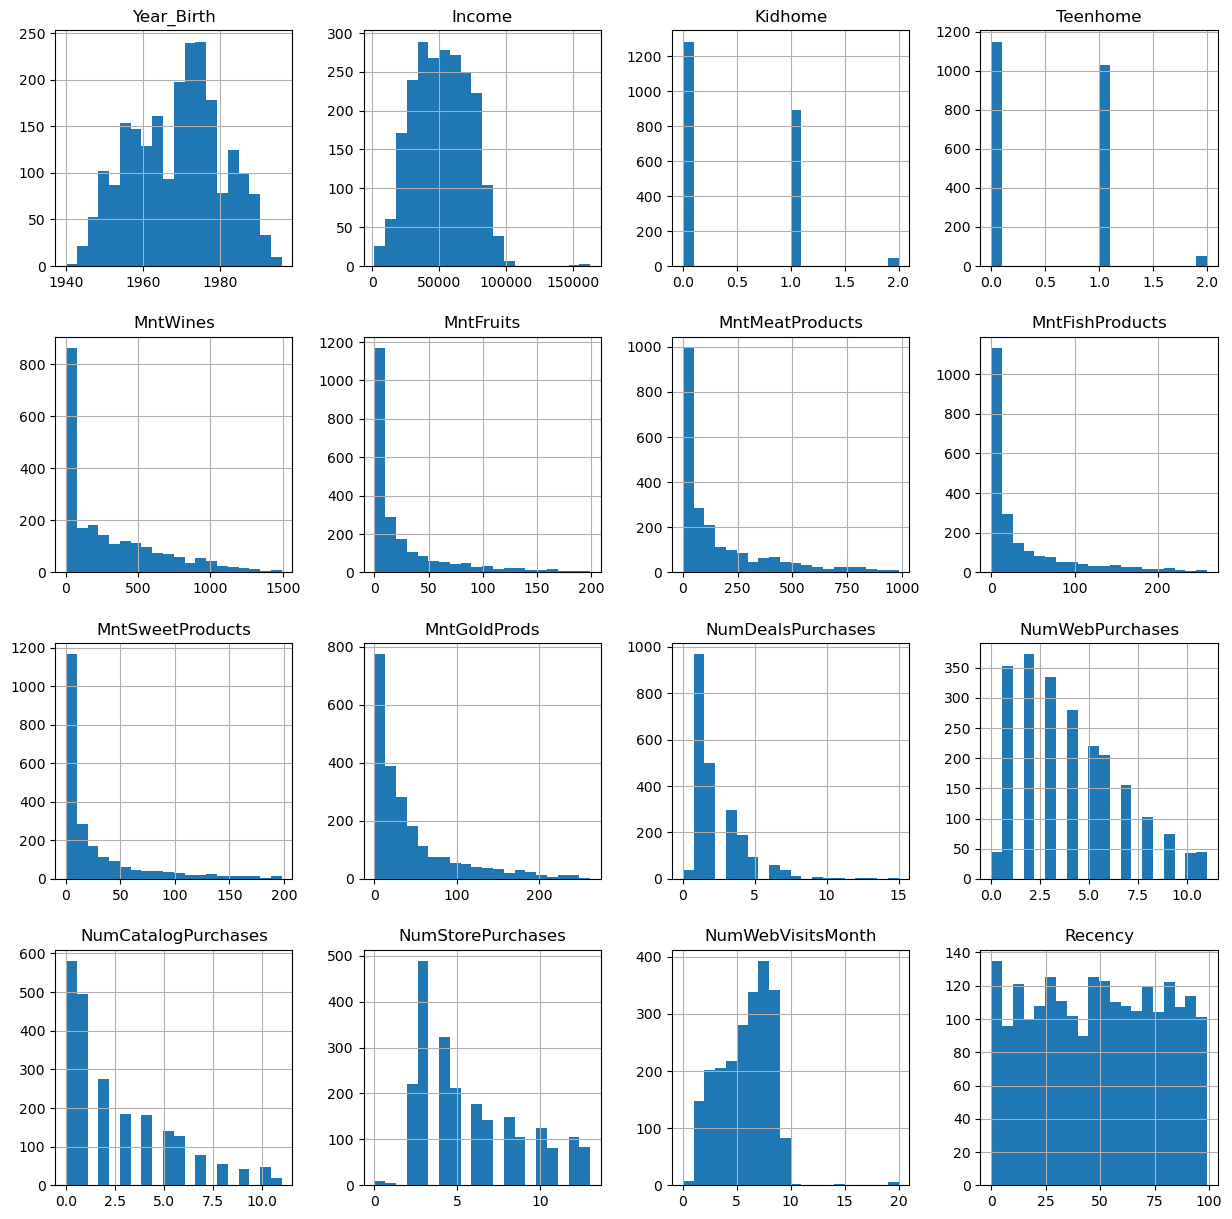

In [21]:
# Explore distributions of numerical variables
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                  'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']
data[numerical_cols].hist(bins=20, figsize=(15, 15))
plt.show()



In [22]:
# Feature Engineering
# Convert categorical variables into numerical format using one-hot encoding
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

# Create new features if necessary
data['Total_MntProducts'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                             data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])
data['Total_Purchases'] = (data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] +
                            data['NumStorePurchases'])

# Drop unnecessary columns
data.drop(['Id', 'Dt_Customer'], axis=1, inplace=True)



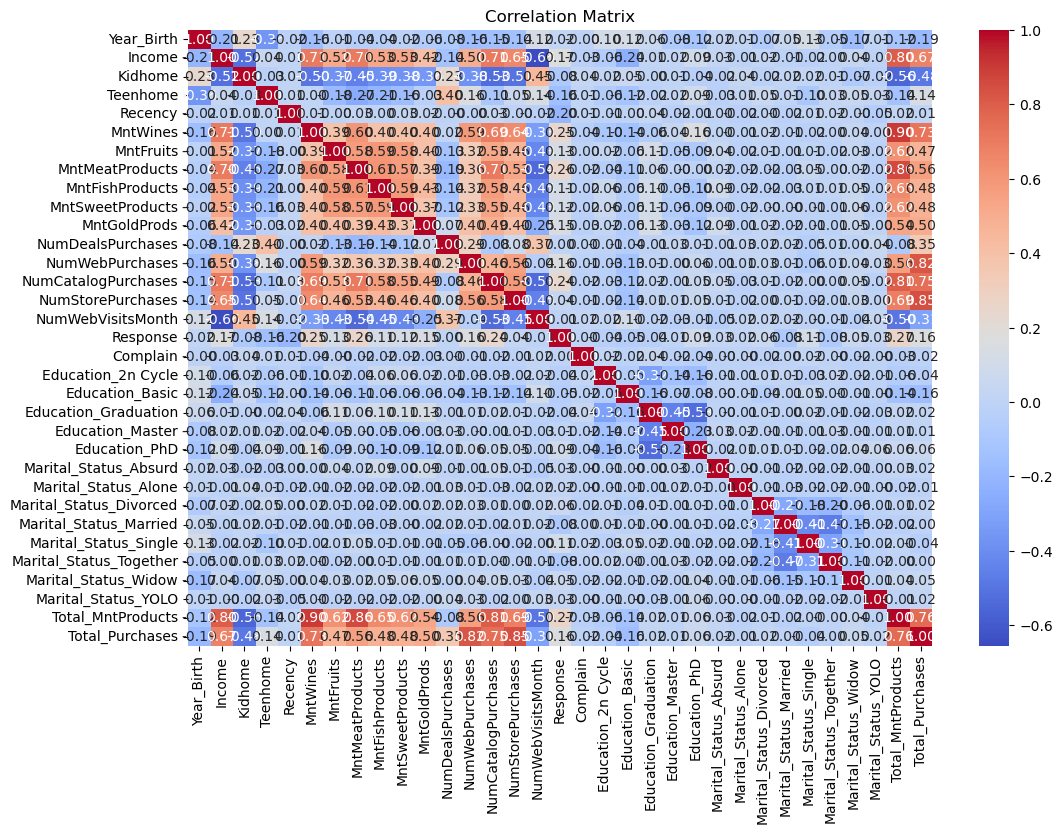

In [23]:
#Explore relationships between variables and the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Split the data into features and target variable
X = data.drop('Response', axis=1)
y = data['Response']


In [25]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((3786, 32), (3786,))

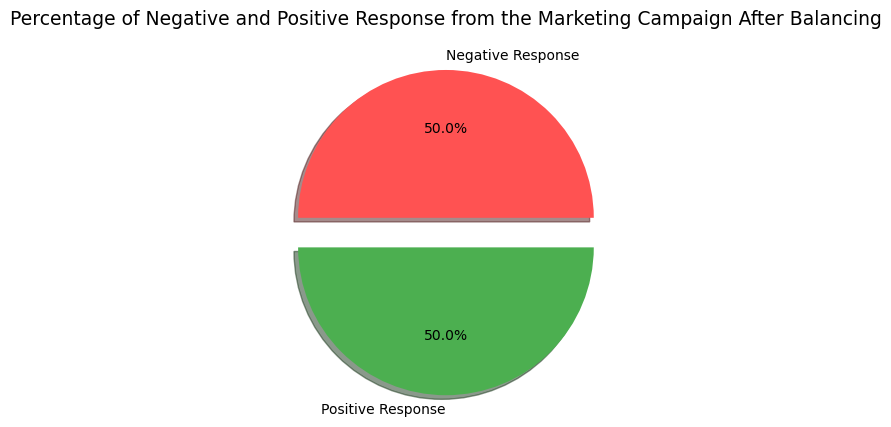

In [26]:
fig, ax = plt.subplots()

ax.pie(
    y_resampled.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign After Balancing', fontsize=13.5)

plt.show()
data.to_csv('cleaned_data1.csv', index=False)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building - Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)

# Model Evaluation
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Model Building - Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Model Evaluation
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


# Model Building - Support Vector Machine
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm.predict(X_test_scaled)

# Model Evaluation
print("\nSupport Vector Machine Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Model Building - Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Model Evaluation
print("\nGradient Boosting Classifier Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

# Model Building - K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Model Evaluation
print("\nK-Nearest Neighbors Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



Logistic Regression Model:
Accuracy: 0.8699551569506726
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       372
           1       0.79      0.30      0.43        74

    accuracy                           0.87       446
   macro avg       0.83      0.64      0.68       446
weighted avg       0.86      0.87      0.84       446

Confusion Matrix:
[[366   6]
 [ 52  22]]

Random Forest Model:
Accuracy: 0.8475336322869955
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       372
           1       0.62      0.22      0.32        74

    accuracy                           0.85       446
   macro avg       0.74      0.59      0.62       446
weighted avg       0.82      0.85      0.82       446

Confusion Matrix:
[[362  10]
 [ 58  16]]

Support Vector Machine Model:
Accuracy: 0.8452914798206278
Classification Report:
              precision    r